In [1]:
import cnn
from cnn import layers
from cnn import activations

In [2]:
model = cnn.Sequential()

model.add(layers.Conv2D(2, (3, 3), activation=activations.ReLU, input_shape=(5, 5, 1)))
model.add(layers.Pooling(pool_mode="max", pool_size=(3, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(2, activation=activations.ReLU))
model.add(layers.Dense(10, activation=activations.Softmax))

model.summary()


Model: Sequential
Layer (type)                       Output Shape                       Param #       
conv2d_1 (Conv2D)                  (None, 3, 3, 2)                    20               
--------------------------------------------------------------------------------
pooling_1 (Pooling)                (None, 1, 1, 2)                    0                
--------------------------------------------------------------------------------
flatten_1 (Flatten)                (None, 2)                          0                
--------------------------------------------------------------------------------
dense_1 (Dense)                    (None, 2)                          6                
--------------------------------------------------------------------------------
dense_2 (Dense)                    (None, 10)                         30               
Total params: 56



In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = [
    [
        [4, 1, 3, 5, 3],
        [2, 1, 1, 2, 2],
        [5, 5, 1, 2, 3],
        [2, 2, 4, 3, 2],
        [5, 1, 3, 4, 5],
    ],
]

w = [
    [
        [1, 2, 3],
        [4, 7, 5],
        [3, -32, 25],
    ],
    [
        [12, 18, 12],
        [18, -74, 45],
        [-92, 45, -18],
    ],
]

conv2d = layers.Conv2D(2, (3, 3),
                       activation=activations.ReLU,
                       input_shape=(5, 5, 1))

conv2d._weights = w

conv2d.forward_propagation(x)

print('Conv2d 1')
print(conv2d.neurons)

x = conv2d.neurons

pooling = layers.Pooling(pool_mode="max",
                         pool_size=(3, 3),
                         pool_strides=(1, 1))

pooling.pooling(x)

print('Pooling 1')
print(pooling.neurons)

flatten = layers.Flatten()

flatten.flattening(pooling.neurons)

print('Flatten')
print(flatten.neurons)

dw1 = [[0, 1, 2], [0, 3, -4]]

dense_1 = layers.Dense(2, activation=activations.ReLU)

dense_1.weights = dw1

dense_1.forward_propagation([0] + flatten.neurons)

print('Dense 1')
print(np.array(dense_1.neurons))

dense_2 = layers.Dense(10, activation=activations.Softmax)

dw2 = [
    [0, 0.09, 0.02],
    [0, 0.08, 0.03],
    [0, 0.07, 0.03],
    [0, 0.06, 0.02],
    [0, 0.05, 0.01],
    [0, 0.04, 0.02],
    [0, 0.03, 0.07],
    [0, 0.04, 0.08],
    [0, 0.05, 0.05],
    [0, 0.01, 0.01],
]

dense_2.weights = dw2

print('Dense 2')
dense_2.forward_propagation([0] + dense_1.neurons, 9)

print(dense_2.neurons)


res1 = pooling.backward_propagation(np.array([[0.07985381622725032, 0.23956144868175097]]))
last_dw = conv2d.backward_propagation(res1)
print(last_dw)

Conv2d 1
[[[0, 76, 64], [109, 0, 10], [118, 71, 67]], [[0, 0, 66], [0, 102, 0], [0, 0, 0]]]
Pooling 1
[[[118]], [[102]]]
Flatten
[118, 102]
Dense 1
[322   0]
Dense 2
[0.9600424991132919, 0.0383585539847754, 0.0015326182592561408, 6.123585183992093e-05, 2.4466820279048145e-06, 9.775732297023165e-08, 3.905899534681163e-09, 9.775732297023165e-08, 2.4466820279048145e-06, 6.2354041109652805e-12]
DE/DO WOYYY
(2, 3, 3)
(2, 3, 3)
[[[  0.           0.           0.        ]
  [  0.           0.           0.        ]
  [  0.23956145  -0.           0.        ]]

 [[  0.           0.           0.        ]
  [  0.         -17.7275472    0.        ]
  [ -0.           0.          -0.        ]]]
(array([[[0.39926908, 0.39926908, 0.07985382],
        [0.15970763, 0.15970763, 0.31941526],
        [0.39926908, 0.07985382, 0.23956145]],

       [[0.23956145, 0.23956145, 0.4791229 ],
        [1.19780724, 0.23956145, 0.4791229 ],
        [0.4791229 , 0.95824579, 0.71868435]]]), [0.07985381622725032, 0.239561

In [4]:
import copy

x = np.array([
    [
        [4, 1, 3, 5, 3],
        [2, 1, 1, 2, 2],
        [5, 5, 1, 2, 3],
        [2, 2, 4, 3, 2],
        [5, 1, 3, 4, 5],
    ],
])

w = np.array([
    [
        [1, 2, 3],
        [4, 7, 5],
        [3, -32, 25],
    ],
    [
        [12, 18, 12],
        [18, -74, 45],
        [-92, 45, -18],
    ],
])

conv = np.array([[[0, 76, 64], [109, 0, 10], [118, 71, 67]], [[0, 0, 66], [0, 102, 0], [0, 0, 0]]])
pool = np.array([[[118]], [[102]]])
flat = np.array([118, 102])

dense1 = np.array([[1, 424, 0]])

dw1 = np.array([[0, 1, 2], [0, 3, -4]])

dense2 = np.array([[1, 118, 102]])

dw2 = np.array([
    [0, 0.09, 0.02],
    [0, 0.08, 0.03],
    [0, 0.07, 0.03],
    [0, 0.06, 0.02],
    [0, 0.05, 0.01],
    [0, 0.04, 0.02],
    [0, 0.03, 0.07],
    [0, 0.04, 0.08],
    [0, 0.05, 0.05],
    [0, 0.01, 0.01],
])

loss = [0.9855923656977197, 0.014200012528660346, 0.00020458798468002033, 2.94762017927464e-06, 4.2468108451510894e-08, 6.118631729183979e-10, 8.815474859239936e-12, 6.118631729183979e-10, 4.2468108451510894e-08, 1.829904835121683e-15]

loss = np.array(list(map(lambda x: [x], loss)))

# print(x)
# print(w)
# print(dw1)
# print(dw2)
# print(loss)




# dE_dnet = dE_dnet(loss, 9)

# dE_dw3 = dE_dnet.dot(dense1)

# print(dE_dw3)

# print()


# print(dE_dnet)
# # dE_dw2 = dE_dnet * dnet_dReLU2 * dReLU2_dX3 * dX3_dw2
# print(dE_dnet.transpose().dot(dw2).transpose().dot(dense2)) 

def dE_dnet(loss, y):
    _loss = copy.copy(loss)
    _loss[y] = - (1 - _loss[y])
    return _loss

def ReLU_X(X):
    res = copy.copy(X)
    for x in np.nditer(res, op_flags=['readwrite']):
       x[...] = 1 if x > 0  else 0
    return res

def X_ReLU(X, ReLU):
    _X = copy.copy(X)
    _ReLU = copy.copy(ReLU)
    for i in range(len(_ReLU)):
        for j in range(len(_ReLU[i])):
            for k in range(len(_ReLU[i][j])):
                _ReLU[i][j][k] = 1 if _ReLU[i][j][k] == _X[i] else 0                    
    return _ReLU

def constant_mult_matrix(m1, m2):
    resi = []
    for i in range(len(m2)):
        resj = []
        for j in range(len(m2[i])):
            resk = []
            for k in range(len(m2[i][j])):
                resk.append(m2[i][j][k] * m1[i])
            resj.append(resk)
        resi.append(resj)                
                
    return np.array(resi)


def biases_correction(weights):
    res = []
    for i in range(len(weights)):
        sum = 0
        for j in range(len(weights[i])):
            for k in range(len(weights[i][j])):
                sum += weights[i][j][k]
        res.append(sum)
    return res

def convolution(matrix, weights, strides):
    height = len(matrix)
    width = len(matrix[0])

    conv = []

    for z in range(len(weights)):
        temp2 = []
        for i in range(0, height - len(weights[z]) + 1, strides[0]):
            temp1 = []
            
            for j in range(0, width - len(weights[z][i]) + 1, strides[1]):
                sum = 0
                for k in range(len(weights[z])):
                    for l in range(len(weights[z][i])):
                        sum += matrix[i + k][j + l] * weights[z][k][l]
                temp1.append(sum)
            temp2.append(temp1)
        conv.append(temp2)

    return np.array(conv)


In [22]:
# dE_dnet(loss, y)
# ReLU_X(X)
# X_ReLU(X, ReLU)

# print(dE_dnet(loss, 9).dot(dense1))
temp = dE_dnet(loss, 9).transpose().dot(dw2)*ReLU_X(dense1)

# print(temp.transpose().dot(dense2))

x1 = temp.dot(dw1.transpose())

print(x1.tolist())

x2 = X_ReLU(pool, conv)

c1 = constant_mult_matrix(x1[0], x2)

c2 = c1*ReLU_X(conv)

print(convolution(x[0], c2, (1, 1)))

# print(temp)

last = np.array([
    [
        [0, 0, 0],
        [0, 0, 0],
        [0.07985382, 0, 0],
    ],
    [
        [0, 0, 0],
        [0, 0.23956145, 0],
        [0, 0, 0],
    ],
])


print(c2.dot(w))

cx = c2 * w *ReLU_X(conv)
cx

[[0.07985381622725032, 0.23956144868175097]]
[[[0.39926908 0.39926908 0.07985382]
  [0.15970763 0.15970763 0.31941526]
  [0.39926908 0.07985382 0.23956145]]

 [[0.23956145 0.23956145 0.4791229 ]
  [1.19780724 0.23956145 0.4791229 ]
  [0.4791229  0.95824579 0.71868435]]]
[[[[  0.           0.           0.        ]
   [  0.           0.           0.        ]]

  [[  0.           0.           0.        ]
   [  0.           0.           0.        ]]

  [[  0.07985382   0.15970763   0.23956145]
   [  0.95824579   1.43736869   0.95824579]]]


 [[[  0.           0.           0.        ]
   [  0.           0.           0.        ]]

  [[  0.95824579   1.67693014   1.19780724]
   [  4.31210608 -17.7275472   10.78026519]]

  [[  0.           0.           0.        ]
   [  0.           0.           0.        ]]]]


array([[[  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ],
        [  0.23956145,  -0.        ,   0.        ]],

       [[  0.        ,   0.        ,   0.        ],
        [  0.        , -17.7275472 ,   0.        ],
        [ -0.        ,   0.        ,  -0.        ]]])

In [6]:


print(convolution(x[0], last, (1, 1)))
print()
print(biases_correction(last))

[[[0.3992691  0.3992691  0.07985382]
  [0.15970764 0.15970764 0.31941528]
  [0.3992691  0.07985382 0.23956146]]

 [[0.23956145 0.23956145 0.4791229 ]
  [1.19780725 0.23956145 0.4791229 ]
  [0.4791229  0.9582458  0.71868435]]]

[0.07985382, 0.23956145]


In [7]:
np.array([[1,2], [3,4]]) * np.array([[1,2], [3,4]])

array([[ 1,  4],
       [ 9, 16]])

In [8]:
from keras.datasets import mnist

Print Sample:


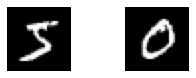


Model: Sequential
Layer (type)                       Output Shape                       Param #       
conv2d_1 (Conv2D)                  (None, 28, 28, 6)                  156              
--------------------------------------------------------------------------------
pooling_1 (Pooling)                (None, 14, 14, 6)                  0                
--------------------------------------------------------------------------------
conv2d_2 (Conv2D)                  (None, 12, 12, 16)                 880              
--------------------------------------------------------------------------------
pooling_2 (Pooling)                (None, 6, 6, 16)                   0                
--------------------------------------------------------------------------------
flatten_1 (Flatten)                (None, 576)                        0                
--------------------------------------------------------------------------------
dense_1 (Dense)                    (None, 120)     

In [9]:
img_rows, img_cols = 28, 28

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.array(X_train)
X_train = np.pad(X_train, ((0, 0), (2, 2), (2, 2)), 'constant').tolist()

for i in range(2):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
    
for i in range(len(X_train)):
    for j in range(len(X_train[i])):
        for k in range(len(X_train[i][j])):
            X_train[i][j][k] /= 255

print("Print Sample:")
plt.show()

lenet5 = cnn.Sequential()

lenet5.add(
    layers.Conv2D(6, (5, 5),
                  activation=activations.ReLU,
                  input_shape=(32, 32, 1)))
lenet5.add(layers.Pooling(pool_mode="average"))
lenet5.add(layers.Conv2D(16, (3, 3), activation=activations.ReLU))
lenet5.add(layers.Pooling(pool_mode="average"))
lenet5.add(layers.Flatten())
lenet5.add(layers.Dense(120, activation=activations.ReLU))
lenet5.add(layers.Dense(84, activation=activations.ReLU))
lenet5.add(layers.Dense(10, activation=activations.Softmax))

lenet5.summary()

X_train = list(map(lambda x: [x], X_train))

lenet5.forward_propagation(X_train[0], 0)
print(np.array(lenet5.layers[-1].neurons))
print()

lenet5.forward_propagation(X_train[1], 0)
print(np.array(lenet5.layers[-1].neurons))
print()


In [10]:
lenet5.weights_summary()

conv2d_1 (6, 5, 5)
[[[-2.70588212e-02 -6.25907615e-03 -4.36402248e-02  3.11571676e-02
    2.75851900e-02]
  [ 5.51090879e-02 -4.13669482e-02  2.47934854e-02 -1.57764382e-02
    8.76477783e-03]
  [-2.46593521e-02  1.79106384e-02 -7.55081260e-03  2.75971160e-02
    2.00777964e-02]
  [-8.98829383e-04 -2.37544036e-02  4.64393940e-03 -6.11644945e-02
    7.69777969e-03]
  [-6.77938613e-02  3.07483908e-02 -1.66547970e-02  8.77347080e-03
    4.07433203e-02]]

 [[ 9.68936087e-03  4.49013657e-02 -3.29831219e-02  3.23109030e-02
    2.55951255e-02]
  [-8.75641876e-03 -7.26522596e-05 -4.62351508e-02 -3.38636375e-02
   -3.88123458e-02]
  [-2.47338426e-02  1.86278770e-02  1.44981948e-02 -1.89822647e-03
    7.65960759e-04]
  [-1.04058044e-03 -1.76067203e-02 -9.91005002e-03  2.29364380e-02
   -1.82025369e-02]
  [ 3.62212532e-02  5.54470454e-03  7.48331236e-03  1.41487478e-02
   -3.32524068e-02]]

 [[ 5.16959665e-02 -1.94213071e-02 -8.14575268e-02  5.79789875e-02
    5.90330248e-03]
  [-5.41865423e-02 -

In [11]:
lenet5.fit(X_train, y_train, 600, 3)

Epoch 1/3
[100/100] [========================================] 
Epoch 2/3
[100/100] [========================================] 
Epoch 3/3
[100/100] [========================================] 


In [12]:
np.array(X_train[0]).shape

(1, 32, 32)

In [13]:
print(y_train[:100])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


In [14]:
import sys

sys.maxsize

9223372036854775807

In [15]:
# Epoch 1/3
# 90/90 [==============================] - 16s 173ms/step - loss: 0.2099 - accuracy: 0.9377 - val_loss: 0.1032 - val_accuracy: 0.9725
# Epoch 2/3
# 90/90 [==============================] - 29s 319ms/step - loss: 0.1362 - accuracy: 0.9591 - val_loss: 0.0776 - val_accuracy: 0.9785
# Epoch 3/3
# 90/90 [==============================] - 23s 252ms/step - loss: 0.1097 - accuracy: 0.9665 - val_loss: 0.0625 - val_accuracy: 0.9835

In [16]:
# import numpy as np
# from tensorflow import keras
# from tensorflow.keras import layers

In [17]:
# # Model / data parameters
# num_classes = 10
# input_shape = (28, 28, 1)

# # the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# # Scale images to the [0, 1] range
# x_train = x_train.astype("float32") / 255
# x_test = x_test.astype("float32") / 255
# # Make sure images have shape (28, 28, 1)
# x_train = np.expand_dims(x_train, -1)
# x_test = np.expand_dims(x_test, -1)
# print("x_train shape:", x_train.shape)
# print(x_train.shape[0], "train samples")
# print(x_test.shape[0], "test samples")


# # convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

In [18]:
# model = keras.Sequential(
#     [
#         keras.Input(shape=input_shape),
#         layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Flatten(),
#         layers.Dropout(0.5),
#         layers.Dense(num_classes, activation="softmax"),
#     ]
# )

# model.summary()

In [19]:
# batch_size = 600
# epochs = 3

# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [20]:
# score = model.evaluate(x_test, y_test, verbose=0)
# print("Test loss:", score[0])
# print("Test accuracy:", score[1])